**Умова:**

Використовуючи датасет з файлу Position_Salaries.csv, побудуйте модель поліноміальної реграсії.

**1. Завантаження датасету з csv файлу.**

In [1]:
import pandas as pd

df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


**2. Проведемо графічний аналіз даних**

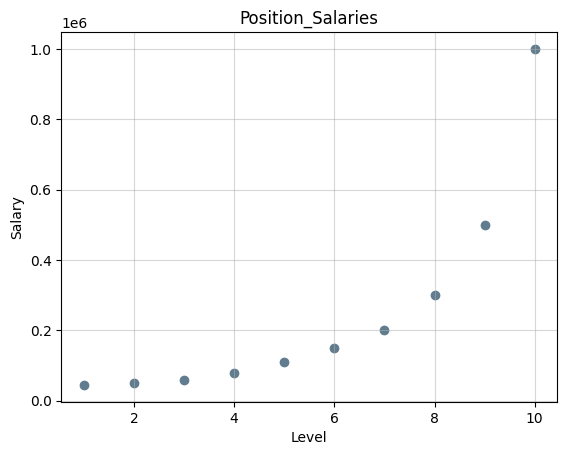

In [5]:
import matplotlib.pyplot as plt

X, y = pd.DataFrame(df['Level']), pd.DataFrame(df['Salary'])

plt.scatter(X, y, color = '#607c8e' )
plt.title("Position_Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.grid(axis='x', alpha=0.5)
plt.grid(axis='y', alpha=0.5)

plt.show()

В результаті, бачимо експоніціальне збільшення параметра **Salary** зі збільшенням параметру **Level**, що робить очевидно недоцільним застосування лінійною моделі регресії. Ступінь поліномінальної регресії визначимо рівним 5.

**3. Побудуємо модель поліномінальної регресії та візуалізуємо результат для початкових даних.**

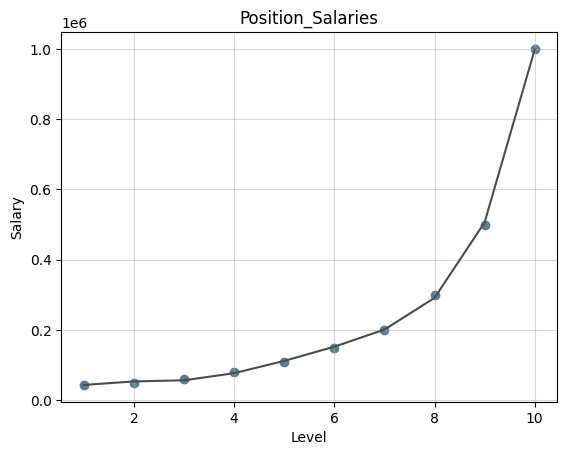

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


# створення моделі поліномінальної регресії із 5 степінями
polynomial_feautures = PolynomialFeatures(degree=5)
X_poly = polynomial_feautures.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y, color = '#607c8e' )
plt.plot(X, y_pred, color = "#494d4e" )
plt.title("Position_Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.grid(axis='x', alpha=0.5)
plt.grid(axis='y', alpha=0.5)

plt.show()

**4. У зв'язку з невеликою кількістю даних в датасеті, проведемо оцінку моделі за допомогою к-кратної кросвалідації.**

In [32]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5)


test_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_poly_train = polynomial_feautures.fit_transform(X_train)
    X_poly_test = polynomial_feautures.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    
    test_scores.append(round(model.score(X_poly_test, y_test), 3))
    
print('Cross Validation score: ', test_scores)

Cross Validation score:  [-8291.556, -0.164, 0.857, 0.919, 0.985]


**Таким чином, за допомогою тренування моделі за методом к-кратної кросвалідації, ми отримали модель поліноміальної регресії задовільної якості.**